In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

In [40]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [41]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.0,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.0,0.983804,0.0,0.000011


Delete 'FECHA_ÚLTIMO_MOVIMIENTO'

In [42]:
df =df.loc[:, df.columns != 'FECHA_ÚLTIMO_MOVIMIENTO']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 261 entries, 0 to DURACIÓN_APROBACIÓN
dtypes: float64(261)
memory usage: 1017.6 KB


In [44]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.0,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.0,0.983804,0.0,0.000011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225206,1.120231e-05,0.000022,0.000000,0.229647,0.229647,0.0,0.918589,0.0,0.000022


# CLUSTERING

In [45]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [49]:
wcss = []
for i in range (1, 18):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

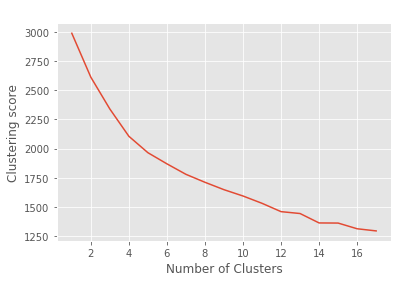

In [50]:
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

As we have seen the optimal n_cluster =4

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [93]:
clustering = KMeans(n_clusters=4, max_iter=300, random_state=42)
clustering.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [94]:
df['KMeans_Cluster'] = clustering.labels_
df.head()

,0,1,2,3,4,5,6,7,8,9,...,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.000000,0.999834,0.0,0.000000,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.000000,0.983804,0.0,0.000011,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120231e-05,0.000022,0.000000,0.229647,0.229647,0.000000,0.918589,0.0,0.000022,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.368937e-06,0.000027,0.000027,0.187913,0.187913,0.000000,0.939564,0.0,0.000000,3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.267798e-06,0.000013,0.000013,0.350997,0.417686,0.066689,0.835372,0.0,0.000000,3


## CLUSTER CENTERS

In [100]:
clustering.cluster_centers_

array([[ 2.01342282e-02,  4.96644295e-01,  6.71140940e-03, ...,
         8.13416980e-04,  3.24689135e-02,  2.22044605e-15],
       [-5.20417043e-18, -2.77555756e-16, -1.11022302e-16, ...,
         4.89412561e-04,  7.24038540e-04,  3.00000000e+00],
       [-5.20417043e-18,  2.54237288e-02,  8.47457627e-03, ...,
         3.55171986e-05,  1.37258828e-04,  2.00000000e+00],
       [-4.33680869e-18,  2.70270270e-02,  3.24324324e-01, ...,
         2.89107525e-06,  7.93465999e-06,  1.00000000e+00]])

## METRICS

## PCA TO TAKE A LOOK OF THE CLUSTER

In [95]:
from sklearn.decomposition import  PCA

In [96]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

,Component_1,Component_2,KMeans_Cluster
0,1.857612,0.443349,3
1,1.643622,0.425556,3
2,1.621061,0.383403,3
3,1.833414,0.376092,3
4,1.666882,0.351238,3
...,...,...,...
494,1.105955,-0.218828,2
495,1.105955,-0.218823,2
496,1.105955,-0.218818,2
497,1.105955,-0.218813,2


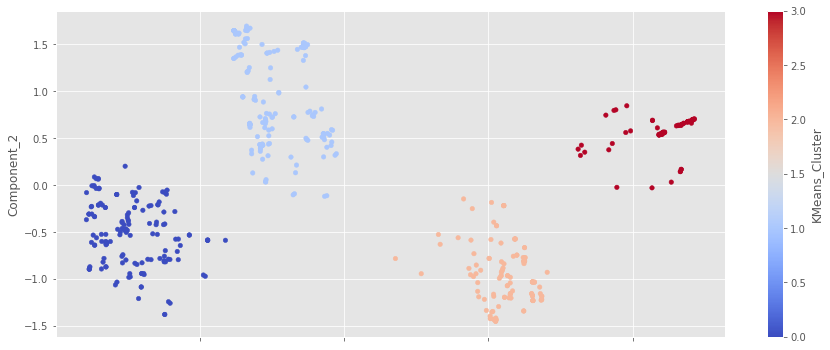

In [97]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [98]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)